### K-means 군집화

#### 필요한 패키지를 불러온다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
%matplotlib inline

#### 데이터를 불러온다

In [2]:
os.chdir(r"..\data")

In [3]:
df = pd.read_csv('data_KOSPI200_en.csv', header='infer',encoding='latin1')

In [4]:
df.shape

(198, 6)

In [5]:
df.head(5)

,CODE,COMPANY,PRICE,RETURN,RISK,BETA
0,138930,BNK-FINANCE,14450.0,-0.11,0.34,-0.14
1,1040,CJ,261000.0,0.50,0.49,1.07
2,120,CJ Daehan,200000.0,0.03,0.39,0.55
3,97950,CJ Cheil,371000.0,-0.02,0.34,0.71
4,114090,GKL,33150.0,-0.06,0.43,0.65


In [6]:
header = df.columns

#### 1). Kmeans 수익률과 리스크 기준으로 2개의 클러스터

In [7]:
X=np.array(df.iloc[:,[3,4]])
companies = np.array(df.iloc[:,1])

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
clusters = kmeans.labels_
centers = kmeans.cluster_centers_
table = np.unique(clusters,return_counts=True)
print('Cluster Sizes :')
print(table)
print('Cluster centers :')
print(centers)

Cluster Sizes :
(array([0, 1]), array([ 63, 135], dtype=int64))
Cluster centers :
[[ 0.62079365  0.53380952]
 [-0.03251852  0.40481481]]


In [9]:
for i in range(2):
    print("Companies in group {} :".format(i))
    print("-----------------------------------")
    print(companies[clusters==i])
    print ("\n")

Companies in group 0 :
-----------------------------------
['CJ' 'GS Retail' 'LG Corp' 'LG Life' 'LG Health' 'LG Chem' 'S&T Motiv'
 'S&T Heavy' 'SBS' 'SKC' 'SK Innovation' 'S-Oil' 'GookDo Chem'
 'Green Cross' 'NongShim' 'Daewoong Medical' 'Daehan' 'DongAh ST'
 'DongWon F&B' 'DongWon Systems' 'Lotte Chemical' 'Lotte food' 'Moohak'
 'Boogwang Medical' 'Samgwang Glass' 'Samlip Food' 'Samsung Trade'
 'Samsung Electric' 'Samsung Precisions' 'SamYang' 'SamYang Holdings'
 'SSangYong' 'ISS DongSuh' 'S1' 'Able C&C' 'NC Soft' 'YoungJin' 'Ottoogi'
 'Orion' 'Unid' 'Yuhan' 'Ildong Medical' 'IlYnag MEdical' 'KosMAx' 'Crown'
 'Korea Danja' 'Korea Steel' 'Korea Colma' 'Korea Aero' 'Hanmi Medical'
 'HanSaem' 'Hanse' 'Hansol Chemical' 'Hansol Technics' 'Hanhwa'
 'Hanhwa Chemical' 'Hanhwa Techwin' 'Hyundai Green Food' 'Hyundai Livart'
 'Hyundai Industries' 'Hyundai Elevator' 'Hyosung' 'Foosung']


Companies in group 1 :
-----------------------------------
['BNK-FINANCE' 'CJ Daehan' 'CJ Cheil' 'GKL' 'GS' 

#### 2). Kmeans 수익률과 리스크 기준으로 3개의 클러스터

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_
centers = kmeans.cluster_centers_
table = np.unique(clusters,return_counts=True)
print('Cluster Sizes :')
print(table)
print('Cluster centers :')
print(centers)

Cluster Sizes :
(array([0, 1, 2]), array([98, 68, 32], dtype=int64))
Cluster centers :
[[ 0.23040816  0.43357143]
 [-0.21235294  0.40867647]
 [ 0.830625    0.5625    ]]


In [11]:
for i in range(3):
    print("Companies in group {} :".format(i))
    print("-----------------------------------")
    print(companies[clusters==i])
    print ("\n")

Companies in group 0 :
-----------------------------------
['CJ' 'CJ Daehan' 'GS' 'KT&G' 'LG' 'LG Corp' 'LG Health' 'LG UPlus'
 'LG Innotech' 'LG Housys' 'NH Finance' 'OCI' 'SBS' 'SK C&C' 'SKC'
 'SK Innovation' 'SK Chemical' 'Kangwon Land' 'KyungBang' 'Korea Zinc'
 'Korea Iron' 'GwangDong' 'Kia Motors' 'NamYang' 'NamHae Chem'
 'Nexxen Tire' 'Green Cross' 'NongShim' 'DaeGyo' 'DaeLim' 'Daewoo Const'
 'Daewoo Finance' 'Daewoong Medical' 'DongKook' 'DongBu Insurance'
 'DongAh Socio' 'DongAh ST' 'DongAh Tire' 'DongWon F&B' 'Doosan'
 'Doosan Heavy' 'Lock and Lock' 'Lotte Pastry' 'Lotte Chilsung'
 'Lotte food' 'Motonik' 'Moorim P&P' 'Moohak' 'Samgwang Glass'
 'Samsung Trade' 'Samsung Life' 'Samsung SDS' 'Samsung Electric'
 'Samsung Electronics' 'Samsung Precisions' 'Samsung Finance'
 'Samsung Insurance' 'SeBang' 'Seah Bestil' 'Shinsegae' 'SSangYong Car'
 'ISS DongSuh' 'S1' 'Able C&C' 'NC Soft' 'YoungPoong' 'Orion' 'Unid'
 'Yuhan' 'EMart' 'Ilshin' 'Iljin Materials' 'Jeil Planification'
 'Chong

#### 3). Kmeans 최근종가,수익률, 리스크, 베타 기준으로 3개의 클러스터

In [12]:
X=np.array(df.iloc[:,[2,3,4,5]])
X = scale(X)

In [13]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(X).labels_
centers = kmeans.cluster_centers_
table = np.unique(clusters,return_counts=True)
print('Cluster Sizes :')
print(table)
print('Cluster centers :')
print(centers)

Cluster Sizes :
(array([0, 1, 2]), array([110,  78,  10], dtype=int64))
Cluster centers :
[[-0.22521643 -0.34795936 -0.53799637 -0.53547471]
 [-0.16349304  0.45620686  0.81750017  0.82012232]
 [ 3.75262639  0.26913942 -0.45854125 -0.5067323 ]]


In [14]:
for i in range(3):
    print("Companies in group {} :".format(i))
    print("-----------------------------------")
    print(companies[clusters==i])
    print ("\n")

Companies in group 0 :
-----------------------------------
['BNK-FINANCE' 'CJ Daehan' 'CJ Cheil' 'GKL' 'GS' 'KB Finance' 'KCC' 'KT'
 'KT&G' 'LF Mall' 'LG' 'LG Display' 'LG UPlus' 'LG Electronics' 'LS'
 'LS Indus' 'NHN' 'POSCO' 'S&T Motiv' 'S&T Heavy' 'SBS' 'SKC' 'SK Network'
 'SK Chemical' 'SK Telecom' 'SK Hynix' 'Kangwon Land' 'KyungBang'
 'Korea Zinc' 'GwangDong' 'GookDo Chem' 'Kumho Oil' 'KumHo Tire'
 'Kia Motors' 'Company Bank' 'NamHae Chem' 'Nexxen Tire' 'NongShim'
 'DaeGyo' 'DaeDuck' 'Daewoo International' 'DongKook' 'DongBu Insurance'
 'DongAh Tire' 'DongWon F&B' 'Doosan' 'Doosan Engine' 'Lock and Lock'
 'Motonik' 'Moorim P&P' 'Moohak' 'Bingre' 'Samgwang Glass' 'Samsung SDI'
 'Samsung Life' 'Samsung Electric' 'Samsung Precisions' 'Samsung Card'
 'Samsung Insurance' 'SeoYeon' 'SeoHung' 'SeBang' 'Seah Bestil'
 'Seah Iron' 'Sejong' 'Shindo-Ricoh' 'Shinhan Jiju' 'SSangYong Car' 'ISL'
 'S1' 'YoungWon' 'Woori' 'Unid' 'EMart' 'Ilshin' 'Jeil Planification'
 'Chosun' 'KoLon' 'Koway' 'Pam

#### 4). "Total Sum of Squares Within"을 계산하여 최적화된 클러스터 개수를 알아낸다.

In [15]:
def total_ss_within(X, centers, clusters):
    N_clusters = centers.shape[0]
    N_columns = centers.shape[1]
    N_rows = X.shape[0]
    ref_centers = np.zeros((N_rows, N_columns))
    for n in range(N_clusters):
        indices = (clusters == n)
        for j in range(N_columns):
            ref_centers[indices,j] = centers[n,j]
    return np.sum((X-ref_centers)**2.0)

Kmeans 최근종가,수익률, 리스크, 베타 기준으로 클러스터 개수의 최적화

In [16]:
X=np.array(df.iloc[:,[2,3,4,5]])

In [17]:
n_cluster = np.array(range(2,16))
total_ssw = np.array([])
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit(X).labels_
    centers = kmeans.cluster_centers_
    total_ssw = np.append(total_ssw, total_ss_within(X,centers,clusters))

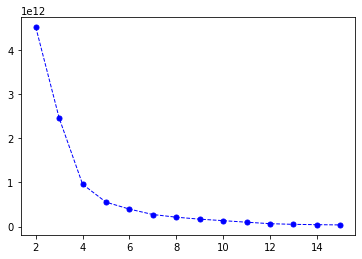

In [18]:
plt.plot(n_cluster,total_ssw,color='blue',marker='o',linestyle='dashed',linewidth=1,markersize=5)
plt.show()